In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings
from sklearn.cluster import KMeans
filterwarnings("ignore")

##### reading lena image and splitting into R, G and B channels

In [2]:
lena = cv2.imread("images/Lena.bmp")
b_lena, g_lena, r_lena = cv2.split(lena)


## 1.1.1

##### calculating H, S and I for Lena

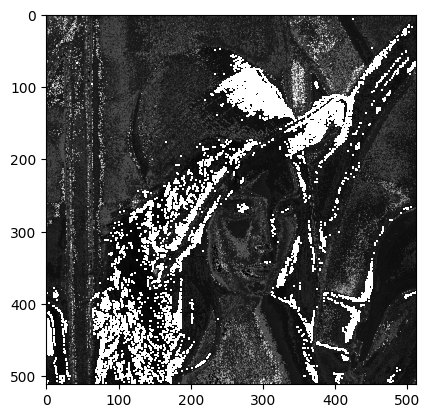

In [3]:
# calculating H

tet = 0.5 * ((r_lena - g_lena) + (r_lena - b_lena)) / ((r_lena - g_lena)**2 + (r_lena - b_lena)*(r_lena - g_lena))**0.5
h_lena = np.arccos(tet)
plt.imshow(tet, cmap="gray")
plt.show()

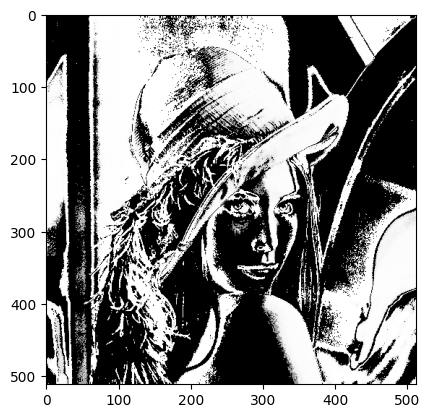

In [4]:
# calculating S for Lena

s_lena = np.zeros_like(b_lena)

for i in range(512):
    for j in range(512):
        s_lena[i, j] = 1 - (3 / (r_lena[i, j] + b_lena[i, j] + g_lena[i, j]) ) * min(r_lena[i, j], g_lena[i, j], b_lena[i, j])
plt.imshow(s_lena, cmap="gray")
plt.show()

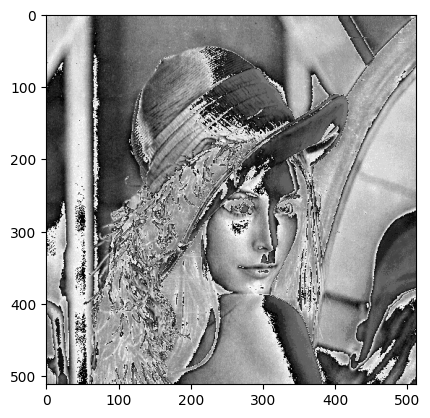

In [5]:
# calculating I for Lena

i_lena = (1/3) * (r_lena + b_lena + g_lena)

plt.imshow(i_lena, cmap="gray")
plt.show()

## 1.1.2

##### YIQ color space

- Y: represents brightness
- I and Q: represent chromaticity

- Y = 0.299R + 0.587G + 0.114B
- I = 0.596R - 0.274G - 0.322B
- Q = 0.211R - 0.523G + 0.312*B

In [6]:
# calculatin Y, I and Q for lena

y_lena = 0.299 * r_lena + 0.58 * g_lena + 0.114 * b_lena
i_lena = 0.596 * r_lena - 0.274 * g_lena - 0.322 * b_lena
q_lena = 0.211 * r_lena - 0.523 * g_lena + 0.312 * b_lena

- r = y + 0.956*i + 0.621*q
- g = y - 0.272*i - 0.647*q
- b = y - 1.106*i + 1.703*q

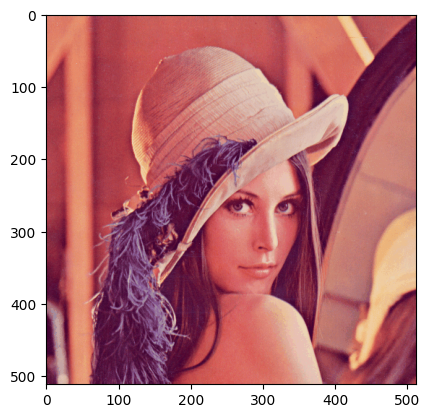

In [7]:
# returning to RGB

r = y_lena + 0.956*i_lena + 0.621*q_lena
g = y_lena - 0.272*i_lena - 0.647*q_lena
b = y_lena - 1.106*i_lena + 1.703*q_lena

img = np.stack((r, g, b), axis=2)
img = img.astype(np.uint8)
plt.imshow(img)
plt.show()


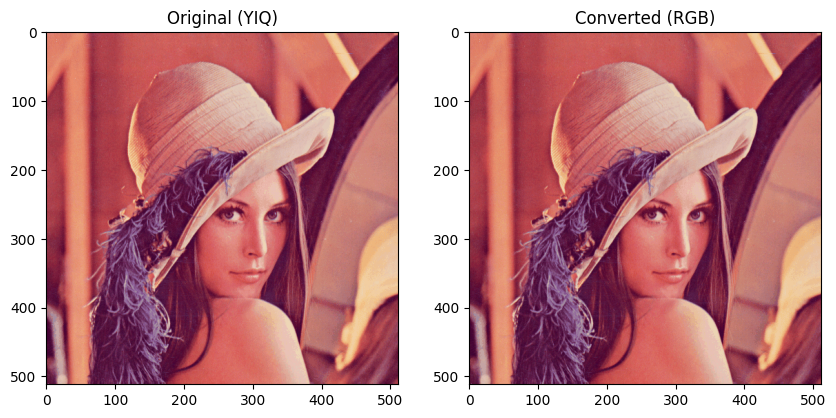

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image in YIQ color space
img_yiq = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

# Split the image into Y, I, Q channels
y, i, q = (y_lena, i_lena, q_lena)

# Convert the YIQ channels to RGB channels
r = y + 0.956*i + 0.621*q
g = y - 0.272*i - 0.647*q
b = y - 1.106*i + 1.703*q

# Merge the RGB channels back into a single image
img_rgb = np.stack([r, g, b], axis=2)
img_rgb = img_rgb.astype(np.uint8)
# Display the original YIQ image and the converted RGB image side by side using pyplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_yiq)
axs[0].set_title('Original (YIQ)')
axs[1].imshow(img_rgb)
axs[1].set_title('Converted (RGB)')
plt.show()

### 1.2.1

In [2]:
# loading baboon image

baboon = cv2.imread("images/Baboon.bmp")
baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
baboon.shape

(512, 512, 3)

##### 32 colors

In [25]:
# converting (512, 512, 3) image to (262144, 3) array

data_set = np.reshape(baboon, (262144, 3))

kmeans = KMeans(n_clusters=32, random_state=42)
kmeans.fit(data_set)

KMeans(n_clusters=32, random_state=42)

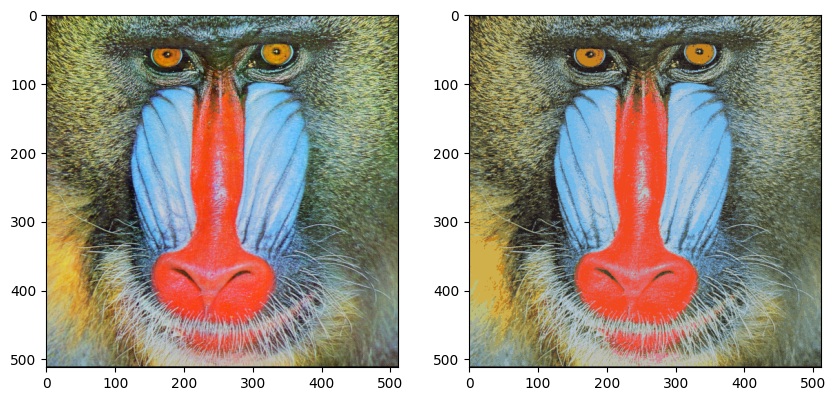

In [26]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

##### 16 colors

In [28]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(data_set)

KMeans(n_clusters=16, random_state=42)

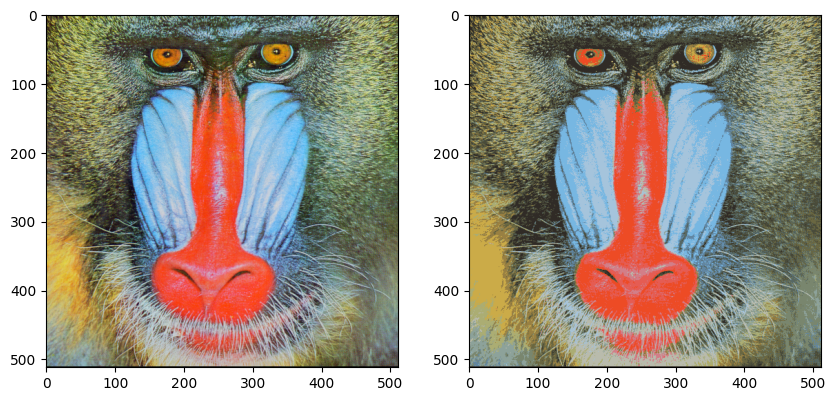

In [29]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

##### 8 colors

In [30]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_set)

KMeans(random_state=42)

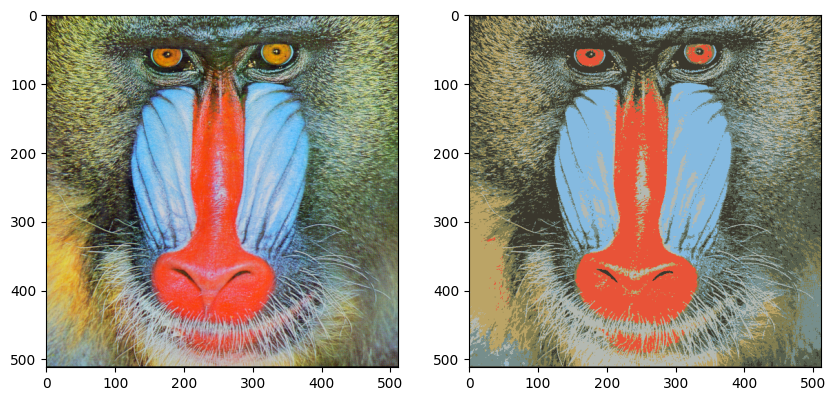

In [31]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

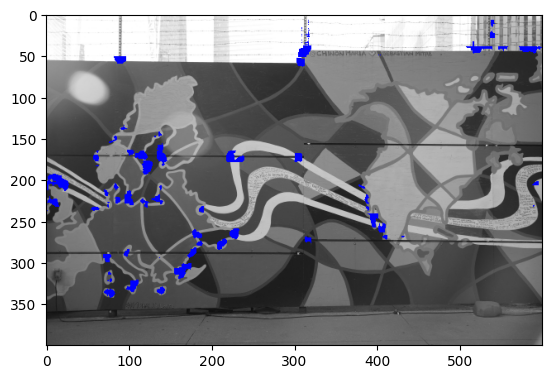

In [105]:
import cv2
import numpy as np

# Load an image
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)

# Define the window size for the Harris corner detector
window_size = 11

# Define the threshold for corner detection
threshold = 0.05

# Define the parameters for the Sobel operator
ksize = 3
dx = 1
dy = 1

# Compute the horizontal and vertical gradients using the Sobel operator
Ix = cv2.Sobel(img, cv2.CV_64F, dx, 0, ksize)
Iy = cv2.Sobel(img, cv2.CV_64F, 0, dy, ksize)

# Compute the elements of the structure tensor
Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

# Compute the sums of the structure tensor elements over the window
Sxx = cv2.boxFilter(Ix2, -1, (window_size, window_size))
Syy = cv2.boxFilter(Iy2, -1, (window_size, window_size))
Sxy = cv2.boxFilter(Ixy, -1, (window_size, window_size))

# Compute the determinant and trace of the structure tensor
det = Sxx * Syy - Sxy ** 2
trace = Sxx + Syy

# Compute the Harris response
harris_response = det - 0.1 * trace ** 2

# Threshold the Harris response to obtain the corner points
corners = np.where(harris_response > threshold * harris_response.max())

# Display the corners on the original image
img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_with_corners[corners] = [0, 0, 255]

plt.imshow(img_with_corners)
plt.show()